In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
# Загрузка данных

data = pd.read_csv('/content/drive/MyDrive/mtech_test/М.Тех_Данные_к_ТЗ_DS.csv', encoding='cp1251', quotechar="'")

data['"Количество больничных дней'] = data['"Количество больничных дней'].str.replace('"','')
data['""Пол"""'] = data['""Пол"""'].str.replace('"','')
data = data.rename(mapper=lambda x: x.replace('"', ''), axis=1)
data['Количество больничных дней'] = pd.to_numeric(data['Количество больничных дней'])

men = data.loc[data['Пол']=='М'] # Мужчины
women = data.loc[data['Пол']=='Ж'] # Женщины

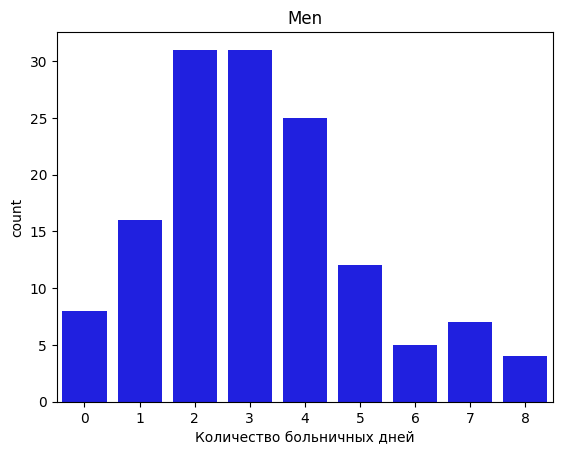

In [51]:
ax = sns.countplot(x='Количество больничных дней',data=men, color='blue').set_title('Men')

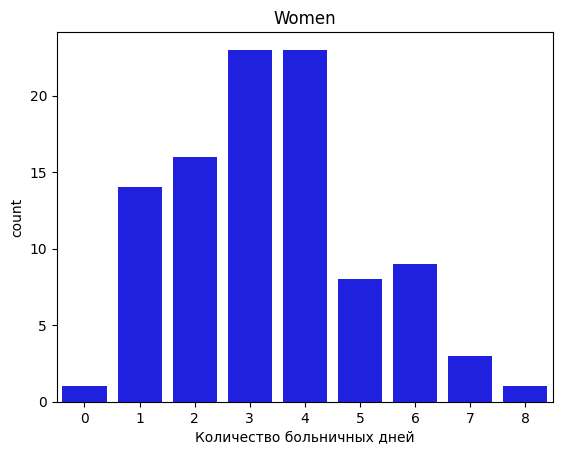

In [52]:
ax = sns.countplot(x='Количество больничных дней',data=women, color='blue').set_title('Women')

In [ ]:
n_m = len(men['Количество больничных дней'])
n_w = len(women['Количество больничных дней'])

In [ ]:
"""Чтобы проверить гипотезу о том, что мужчины пропускают более 2-х дней по болезни значимо чаще женщин,
построим эмпиририческую функцию распределения (ECDF) числа пропущенных дней для мужчин и для женщин
и вычислим доверительные интервалы для значений ECDF в точке 2. Если интервалы пересекутся, значит статистически значимой разницы нет.
Гипотеза подтвердится, если значение ECDF для мужчин в точке 2 окажется значимо меньше, чем значение ECDF для женщин
(т.е. верхняя граница интервала для мужчин окажется меньше нижней границы интервала для женщин)"""

<Axes: xlabel='Количество больничных дней', ylabel='Proportion'>

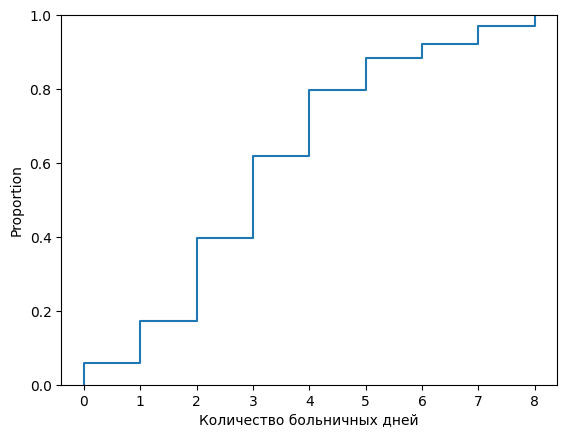

In [55]:
sns.ecdfplot(x='Количество больничных дней',data=men)

<Axes: xlabel='Количество больничных дней', ylabel='Proportion'>

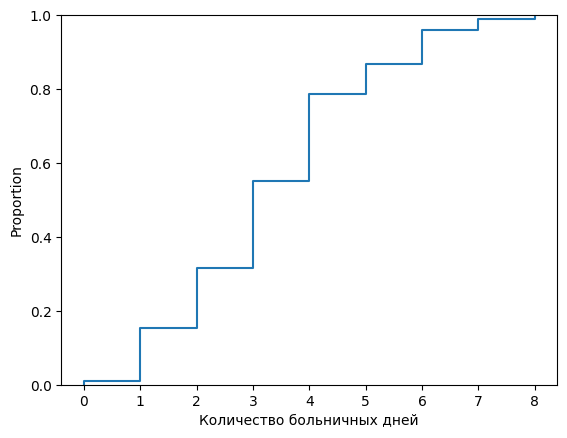

In [56]:
sns.ecdfplot(x='Количество больничных дней',data=women)

In [19]:
# Эмпирические функции распределения числа пропущенных дней

men_ecdf = stats.ecdf(men['Количество больничных дней']).cdf.probabilities
women_ecdf = stats.ecdf(women['Количество больничных дней']).cdf.probabilities

p_m = men_ecdf[2]
p_w = women_ecdf[2]

In [ ]:
"""Каждое значение ECDF является случайной величиной из биномиального распределения с параметрами n и p B(n, p)
где n - число наблюдений, p - значение функции распределения в данной точке.
Воспользовавшись центральной предельной теоремой, допустим, что биномиальное распределение можно аппроксимировать до нормального N(np, np(1-p)).
Воспользовавшись этим допущением, найдём доверительные интервалы параметра p биномиального распределения."""

In [26]:
alpha = 0.05 # уровень значимости
quantile = stats.norm.ppf(1-alpha/2)

men_lower, men_upper = p_m - quantile * np.sqrt(p_m * (1 - p_m) / n_m), p_m + quantile * np.sqrt(p_m * (1 - p_m) / n_m)
women_lower, women_upper = p_w - quantile * np.sqrt(p_w * (1 - p_w) / n_w), p_w + quantile * np.sqrt(p_w * (1 - p_w) / n_w)

if men_upper < women_lower:
  print('Гипотезу о том, что мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин следует принять')
else:
  print('Гипотезу о том, что мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин следует отклонить')

Гипотезу о том, что мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин следует отклонить


In [ ]:
"""Проведём все те же действия для проверки второй гипотезы: Работники старше 35 лет (age) пропускают в течение года более 2 рабочих
дней (work_days) по болезни значимо чаще своих более молодых коллег."""

In [27]:
younger = data.loc[data['Возраст'] <= 35]
older = data.loc[data['Возраст'] > 35]

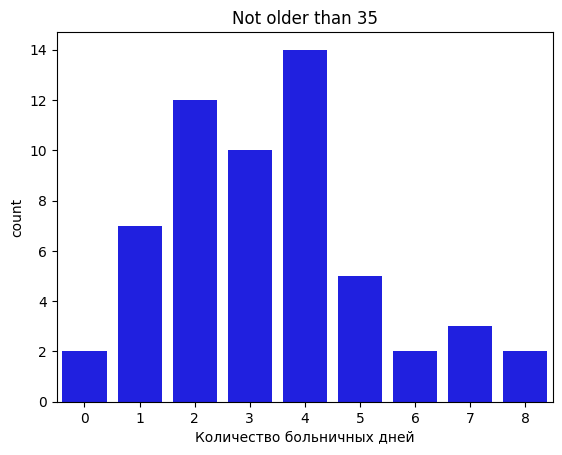

In [53]:
ax = sns.countplot(x='Количество больничных дней',data=younger, color='blue').set_title('Not older than 35')

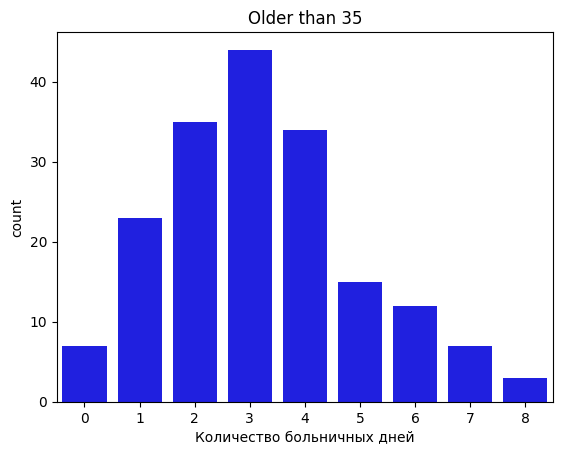

In [54]:
ax = sns.countplot(x='Количество больничных дней',data=older, color='blue').set_title('Older than 35')

In [34]:
n_y = len(younger['Количество больничных дней'])
n_o = len(older['Количество больничных дней'])

In [32]:
younger_ecdf = stats.ecdf(younger['Количество больничных дней']).cdf.probabilities
older_ecdf = stats.ecdf(older['Количество больничных дней']).cdf.probabilities

p_y = younger_ecdf[2]
p_o = older_ecdf[2]

In [38]:
alpha = 0.05 # уровень значимости
quantile = stats.norm.ppf(1-alpha/2)

younger_lower, younger_upper = p_y - quantile * np.sqrt(p_y * (1 - p_y) / n_y), p_y + quantile * np.sqrt(p_y * (1 - p_y) / n_y)
older_lower, older_upper = p_o - quantile * np.sqrt(p_o * (1 - p_o) / n_o), p_o + quantile * np.sqrt(p_o * (1 - p_o) / n_o)

if older_upper < younger_lower:
  print('Гипотезу о том, что работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег следует принять')
else:
  print('Гипотезу о том, что работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег следует отклонить')

Гипотезу о том, что работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег следует отклонить
